In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
from textblob import TextBlob

from collections import Counter
from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import dill

In [7]:
X = dill.load(open('data/matrix/X_cv', 'rb'))
cv = dill.load(open('data/vectors/cv', 'rb'))

In [8]:
vocab = np.array(cv.get_feature_names())
counts = X.toarray().sum(0)
vocab[np.argsort(-counts)[:100]]

array(['growth', 'world', 'new', 'economic', 'economy', 'stock', 'oil',
       'wall', 'investors', 'said', 'prices', 'says', 'shares', 'week',
       'month', 'street', 'wall street', 'since', 'asian', 'percent',
       'two', 'asia', 'first', 'thursday', 'dollar', 'earnings', 'monday',
       'friday', 'quarter', 'tensions', 'tuesday', 'business', 'day',
       'third', 'higher', 'next', 'may', 'report', 'wednesday',
       'concerns', 'gold', 'october', 'top', 'last', 'tech', 'bank',
       'oct', 'years', 'billion', 'one', 'time', 'high', 'financial',
       'companies', 'rising', 'post', 'hit', 'september', 'fears', 'back',
       'japan', 'oil prices', 'sales', 'demand', 'fell', 'fall',
       'expected', 'deal', 'elections', 'third quarter', 'american',
       'gains', 'biggest', 'would', 'set', 'low', 'impact', 'foreign',
       'policy', 'according', 'exports', 'worries', 'end', 'largest',
       'state', 'government', 'european', 'ahead', 'index', 'data',
       'lower', 'mid

In [9]:
countfreq = np.array(Counter(counts).most_common()).T

In [10]:
[countfreq[0,:20]]

[array([ 3,  4,  5,  6,  7,  8,  9, 10, 12, 11, 13, 15, 14, 18, 16, 19, 17,
        20, 21, 22])]

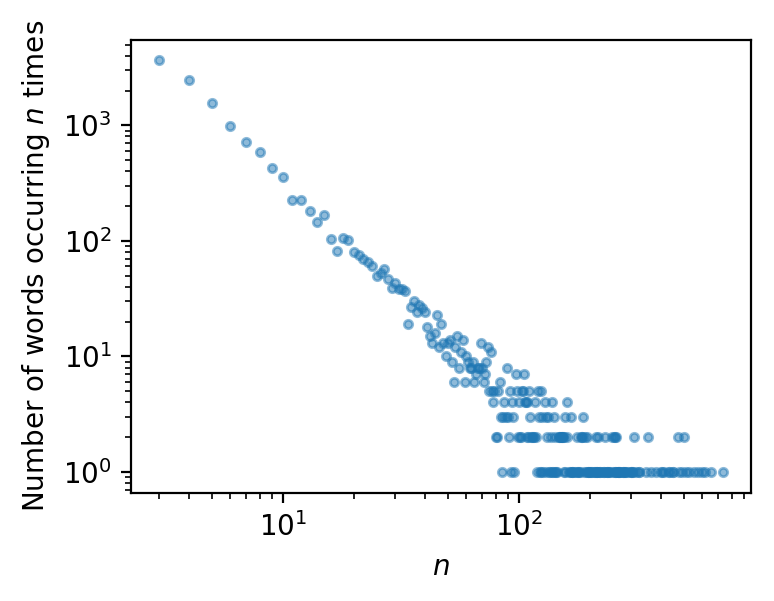

In [11]:
%config InlineBackend.figure_format = 'png'
plt.figure(dpi=200,figsize=(4,3))
plt.plot(*countfreq,'.',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$n$")
plt.ylabel("Number of words occurring $n$ times")
plt.savefig('bubble_countfreq.svg');

### LDA Dimension Reduction

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [18]:
n_components = 20

lda = LatentDirichletAllocation(n_components=n_components, 
                                learning_method='online',
                                learning_decay = 0.6,
                                batch_size = 256,
                                learning_offset=1024,
                                topic_word_prior = 0.005,
                                random_state=0)

lda.fit(X)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.6,
             learning_method='online', learning_offset=1024,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=0.005,
             total_samples=1000000.0, verbose=0)

In [19]:
lda.perplexity(X)

27113.65143003932

In [20]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
visiting
fewer
nordea
nordea markets
students
tourists
school
fixed
sign
returns

TOPIC 1
billions
dollars
billions dollars
model
jet
hundreds
opens
bridge
longest
hundreds billions

TOPIC 2
fair
record surplus
guest
biggest fair
guest loom
loom biggest
unwelcome guest
unwelcome
exporters
biggest

TOPIC 3
cramer
north
senate
north dakota
dakota
election
heitkamp
giants
jim
germany

TOPIC 4
growth
economic
world
economy
said
new
says
oil
quarter
first

TOPIC 5
wall
stock
street
shares
wall street
investors
asian
dollar
week
gold

TOPIC 6
bmw
control
take
venture
foreign
joint
house
joint venture
take control
new

TOPIC 7
taiwan
elections
midterm
says
military
midterm elections
democrats
talks
house
said

TOPIC 8
capital
capital outflows
outflows
andrew
andrew galbraithshanghai
galbraithshanghai
galbraithshanghai oct
eye
shen
restricting

TOPIC 9
lng
gas
brazil
bolsonaro
presidential
jair
natural
bets
jair bolsonaro
candidate

TOPIC 10
iphone
times
new york
york
calls
russia
new


In [21]:
from pyLDAvis import sklearn
from pyLDAvis import display

In [22]:
viz=sklearn.prepare(lda, X, cv, R=20)
display(viz)

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [23]:
from sklearn.preprocessing import normalize

In [24]:
w = lda.transform(X)
w = w[:,:15]
w_normalized = normalize(w,axis=1,norm='l1')

In [25]:
cols = ['stock market', 
        'agriculture', 
        'hongkong macau oversea bridge', 
        'crude oil&LV', 
        'asia investment', 
        'gold', 
        'spies', 
        'brexit', 
        'aviation tech steal',
        'taiwan strait defense',
        'car', 
        'factory location', 
        'negative effects', 
        'xinjiang oppression', 
        'ivanka' ]
doc_topic_prob = pd.DataFrame(w_normalized,columns=cols)

In [26]:
doc_topic_prob.head(10)

,stock market,agriculture,hongkong macau oversea bridge,crude oil&LV,asia investment,gold,spies,brexit,aviation tech steal,taiwan strait defense,car,factory location,negative effects,xinjiang oppression,ivanka
0,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.001005,0.985930
1,0.001361,0.001361,0.001361,0.980952,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361,0.001361
2,0.000810,0.000810,0.000810,0.000810,0.000810,0.988664,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810
3,0.001575,0.001575,0.001575,0.001575,0.374525,0.605002,0.001575,0.001575,0.001575,0.001575,0.001575,0.001575,0.001575,0.001575,0.001575
4,0.001290,0.001290,0.001290,0.372536,0.334890,0.277091,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290
5,0.001869,0.001869,0.001869,0.001869,0.973832,0.001869,0.001869,0.001869,0.001869,0.001869,0.001869,0.001869,0.001869,0.001869,0.001869
6,0.000810,0.988664,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810,0.000810
7,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
8,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.981457,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325
9,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.928205,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128


In [27]:
doc_topic_prob.shape

(5916, 15)

### Sentiment Analysis

In [28]:
df_sentiment = pd.DataFrame(columns = ['polarity', 'subjectivity'])

In [29]:
for i in range(len(content)):
    df_sentiment.loc[i,'polarity'] = TextBlob(content[i]).sentiment.polarity
    df_sentiment.loc[i,'subjectivity'] = TextBlob(content[i]).sentiment.subjectivity

NameError: name 'content' is not defined

In [ ]:
df_sentiment = df_sentiment.astype(float)

In [ ]:
df_sentiment['topic'] = ''
for i in range(doc_topic_prob.shape[0]):
    topic = ''
    dominant = doc_topic_prob.loc[i].nlargest(1)
    if dominant.values >= 0.1:
        df_sentiment.loc[i,'topic'] = dominant.index.format()[0]
    else:
        df_sentiment.loc[i,'topic'] = 'others'

In [ ]:
df_sentiment.polarity_1 = 0

In [ ]:
neg = df_sentiment.polarity <= -0.05
df_sentiment.loc[neg,'polarity_1'] = -1

In [ ]:
pos = df_sentiment.polarity >= 0.2
df_sentiment.loc[pos,'polarity_1'] = 1

In [ ]:
df_sentiment.head(25)

In [ ]:
df_effect = df_sentiment.groupby('topic')['polarity','polarity_1'].mean().sort_values('polarity_

In [ ]:
df_effect

In [ ]:
import seaborn as sns

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.heatmap(df_effect,cmap='BrBG',vmin = -0.2, vmax = 0.2);